# Импорт библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import islice

import torch
import torchvision
import torch.nn as nn 

In [2]:
from torch.utils.data import TensorDataset

In [3]:
from torch.utils.data import DataLoader, Dataset

# Создание модели

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1./3, random_state=1)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_norm = sc.fit_transform(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
X_test_norm = sc.transform(X_test)

y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [26]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.l1(x)
        x = nn.Sigmoid()(x)
        x = self.l2(x)
        
        return x
        

In [31]:
input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size)

In [32]:
learning_rate = .001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [33]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_list = [0] * num_epochs

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        
        loss.backward()
        
        optimizer.step()
        optimizer.zero_grad()
        
        loss_hist[epoch] += loss.item() * y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_list[epoch] += is_correct.sum()
        
        loss_hist[epoch] /= len(train_dl.dataset)
        accuracy_list[epoch] /= len(train_dl.dataset)
        
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, Loss: {loss:.3f}')

Epoch: 0, Loss: 0.984
Epoch: 10, Loss: 0.708
Epoch: 20, Loss: 0.131
Epoch: 30, Loss: 0.349
Epoch: 40, Loss: 0.051
Epoch: 50, Loss: 0.152
Epoch: 60, Loss: 0.077
Epoch: 70, Loss: 0.291
Epoch: 80, Loss: 0.670
Epoch: 90, Loss: 0.300


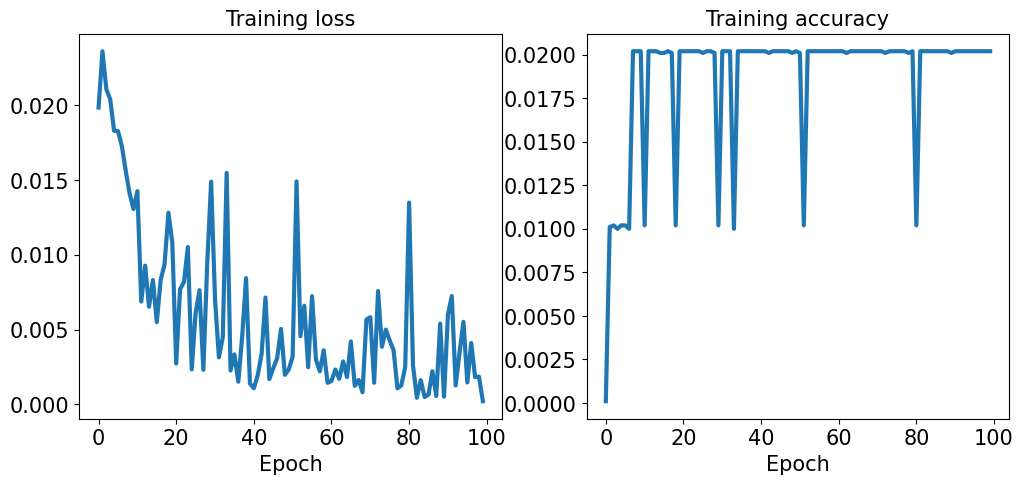

In [34]:
fig = plt.figure(figsize=(12, 5))

# График 1: Training loss
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

# График 2: Training accuracy
ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_list, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [35]:
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)

pred_test = model(X_test_norm)
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
correct.mean()

tensor(0.9600)

# Глава 13

In [4]:
t1 = torch.tensor(3.14, requires_grad=True)

In [5]:
t1

tensor(3.1400, requires_grad=True)

In [12]:
t2 = torch.tensor([1., 2., 3.])
t2

tensor([1., 2., 3.])

In [14]:
print(t2.requires_grad)
t2.requires_grad_()
print(t2.requires_grad)

False
True


In [16]:
t2.requires_grad_(False)

tensor([1., 2., 3.])

In [18]:
w = torch.randn([4, 5], requires_grad=True)
w

tensor([[ 0.6511,  0.6385,  0.5595,  0.8649, -1.8471],
        [ 0.6112, -1.0578, -1.0318,  0.4231,  0.4848],
        [ 0.5688, -2.0874, -1.1840,  0.0923,  0.0201],
        [-0.9886, -0.8803,  1.6740, -0.7043, -1.6903]], requires_grad=True)

In [19]:
torch.manual_seed(1)
w = torch.empty([2, 3])
nn.init.xavier_normal_(w)
w

tensor([[ 0.4183,  0.1688,  0.0390],
        [ 0.3930, -0.2858, -0.1051]])

In [20]:
model = nn.Sequential(nn.Linear(4, 16), nn.ReLU(), nn.Linear(16, 32), nn.ReLU())
model

Sequential(
  (0): Linear(in_features=4, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=32, bias=True)
  (3): ReLU()
)

In [ ]:
model[0].weight

Parameter containing:
tensor([[ 0.1826, -0.1949, -0.0365, -0.0450],
        [ 0.0725, -0.0020,  0.4371,  0.1556],
        [-0.1862, -0.3020, -0.0838, -0.2157],
        [-0.1602,  0.0239,  0.2981,  0.2718],
        [-0.4888,  0.3100,  0.1397,  0.4743],
        [ 0.3300, -0.4556, -0.4754, -0.2412],
        [ 0.4391, -0.0833,  0.2140, -0.2324],
        [ 0.4906, -0.2115,  0.3750,  0.0059],
        [-0.2634,  0.2570, -0.2654,  0.1471],
        [-0.1444, -0.0548, -0.4807, -0.2384],
        [ 0.2713, -0.1215,  0.4980,  0.4008],
        [-0.0234, -0.3337,  0.3045,  0.1552],
        [-0.3232,  0.3248,  0.3036,  0.4434],
        [-0.2803, -0.0823, -0.0097,  0.0730],
        [-0.3795, -0.3548,  0.2720, -0.1172],
        [ 0.2442,  0.0285,  0.1642,  0.1099]], requires_grad=True)

In [25]:
nn.init.xavier_uniform_(model[0].weight)
model[0].weight

Parameter containing:
tensor([[-0.0037, -0.1909, -0.5170, -0.3313],
        [-0.0468, -0.1748,  0.4068,  0.4452],
        [ 0.3489,  0.2424, -0.4342,  0.5175],
        [-0.4827, -0.1801, -0.3855,  0.1970],
        [-0.4558, -0.2700, -0.3479, -0.3367],
        [-0.2557,  0.5384, -0.0447,  0.1670],
        [-0.5437,  0.4870, -0.1193, -0.5027],
        [ 0.3775, -0.1481,  0.4974, -0.3720],
        [-0.5085, -0.4115,  0.2373, -0.0614],
        [-0.5074,  0.1016, -0.0349,  0.1979],
        [-0.2786, -0.3910,  0.3733, -0.2636],
        [ 0.3853,  0.4441, -0.3830, -0.2525],
        [ 0.0659, -0.5164,  0.1682, -0.2282],
        [-0.2428, -0.4234,  0.2562, -0.3490],
        [-0.4378, -0.1440, -0.3049, -0.5325],
        [ 0.2207, -0.2084,  0.3837,  0.3856]], requires_grad=True)

In [26]:
l1_w = .01
l1_penalty = l1_w * model[2].weight.abs().sum()

In [27]:
l1_penalty

tensor(0.6464, grad_fn=<MulBackward0>)

In [32]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.001)

# Задача классификации XOR

Задача классификации XOR (исключающего ИЛИ)- это классическая задача для анализа способности
модели построить нелинейную разделяющую границу между двумя классами.

In [80]:
torch.manual_seed(1)
np.random.seed(1)
X = np.random.uniform(low=-1, high=1, size=[200, 2])
y = np.ones(len(X))

y[X[:, 0] * X[:, 1] < 0] = 0

In [81]:
n_train = 100

X_train = torch.tensor(X[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)

X_valid = torch.tensor(X[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)


In [82]:
l_model = nn.Sequential(nn.Linear(2, 1), nn.Sigmoid())
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(l_model.parameters(), lr=.001)

In [83]:
train_ds = TensorDataset(X_train, y_train)
batch_size = 2
torch.manual_seed(1)

train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [84]:
def train_model(l_model, num_epochs, train_dl, X_valid, y_valid):
    num_epochs = 200
    loss_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    acc_hist_train = [0] * num_epochs
    acc_hist_valid = [0] * num_epochs
    
    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:
            pred = l_model(x_batch)[:, 0]  # Зачем [:, 0] 
            loss = criterion(pred, y_batch)
            
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            loss_hist_train[epoch] += loss.item()
            
            is_correct = ((pred >= .5).float() == y_batch).float()   # Зачем .float()
            acc_hist_train[epoch] += is_correct.mean()
            
        loss_hist_train[epoch] /= n_train/batch_size
        acc_hist_train[epoch] /= n_train/batch_size
        
        pred = l_model(X_valid)[:, 0]
        loss = criterion(pred, y_valid)
        loss_hist_valid[epoch] = loss.item()
        is_correct = ((pred >= .5).float() == y_valid).float()   # Зачем .float()
        acc_hist_valid[epoch] += is_correct.mean()
        
        if epoch % 10 == 0: print(f'loss_hist_train: {loss_hist_train} | acc_hist_train: {acc_hist_train} \n loss_hist_valid: {loss_hist_valid} | {acc_hist_valid}')
    
    return loss_hist_train, loss_hist_valid, acc_hist_train, acc_hist_valid

In [85]:
history = train_model(l_model, 200, train_dl, X_valid, y_valid)

loss_hist_train: [0.6969345760345459, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] | acc_hist_train: [tensor(0.3800), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Text(0.5, 0, 'Epochs')

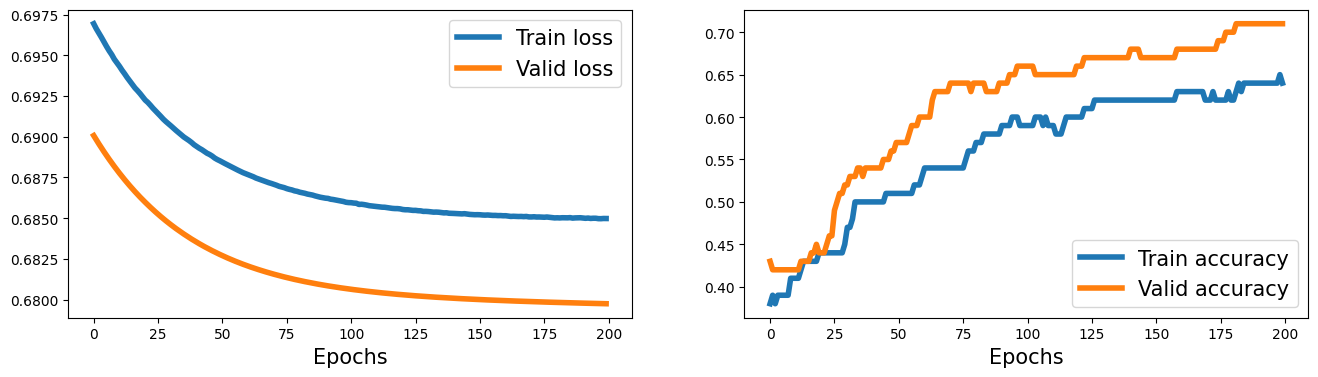

In [86]:
fig = plt.figure(figsize=[16, 4])
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['Train loss', 'Valid loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['Train accuracy', 'Valid accuracy'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

# Упражнение!

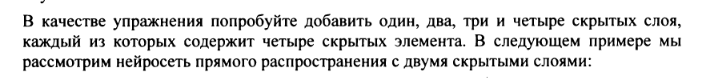